\newpage

## Chronic Kidney Disease Classification Challenge

### Overview

Engage with the dataset from the [Early Stage of Indians Chronic Kidney Disease (CKD)](https://archive.ics.uci.edu/dataset/336/chronic+kidney+disease) project, which comprises data on 250 early-stage CKD patients and 150 healthy controls.

For foundational knowledge on the subject, refer to "Predict, diagnose, and treat chronic kidney disease with machine learning: a systematic literature review" by [Sanmarchi et al., (2023)](https://link.springer.com/article/10.1007/s40620-023-01573-4).


\newpage

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [42]:
from sklearn.decomposition import PCA, TruncatedSVD, FactorAnalysis
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from sklearn import neighbors
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from scipy import stats
from scipy.io import arff

In [39]:
import pandas as pd
from scipy.io import arff

data, meta = arff.loadarff('/Users/fengjingru/Desktop/STATS 3DA3/chronic_kidney_disease.arff')
df = pd.DataFrame(data)
print(df.head(10))

    age     bp        sg    al    su          rbc           pc            pcc  \
0  48.0   80.0  b'1.020'  b'1'  b'0'         b'?'    b'normal'  b'notpresent'   
1   7.0   50.0  b'1.020'  b'4'  b'0'         b'?'    b'normal'  b'notpresent'   
2  62.0   80.0  b'1.010'  b'2'  b'3'    b'normal'    b'normal'  b'notpresent'   
3  48.0   70.0  b'1.005'  b'4'  b'0'    b'normal'  b'abnormal'     b'present'   
4  51.0   80.0  b'1.010'  b'2'  b'0'    b'normal'    b'normal'  b'notpresent'   
5  60.0   90.0  b'1.015'  b'3'  b'0'         b'?'         b'?'  b'notpresent'   
6  68.0   70.0  b'1.010'  b'0'  b'0'         b'?'    b'normal'  b'notpresent'   
7  24.0    NaN  b'1.015'  b'2'  b'4'    b'normal'  b'abnormal'  b'notpresent'   
8  52.0  100.0  b'1.015'  b'3'  b'0'    b'normal'  b'abnormal'     b'present'   
9  53.0   90.0  b'1.020'  b'2'  b'0'  b'abnormal'  b'abnormal'     b'present'   

              ba    bgr  ...   pcv     wbcc  rbcc     htn      dm    cad  \
0  b'notpresent'  121.0  ...  44

In [56]:
CKDisease = pd.read_csv('/Users/fengjingru/Desktop/STATS 3DA3/3DA_A6/kidney_disease.csv')

1. Classification Problem Identification: 
- This dataset can be used to predict the chronic kidney disease and it can be collected from the hospital nearly 2 months of period. 
- The variables are 'blood pressure', 'specific gravity', 'albumin', 'sugar', 'red blood cells', 'pus cell', 'pus cell clumps' , 'bacteria', 'blood glucose random' , 'blood urea', 'serum creatinine', 'sodium', 'potassium', 'hemoglobin', 'packed cell volume', 'white blood cell count', 'red blood cell count', 'hypertension', 'diabetes mellitus', 'coronary artery disease', 'appetite', 'pedal edema', 'anemia', 'class'.
- After the analysis, it can help people better understand whether they have chronic kidney Disease so as to treat it as soon as possible. 	

2. Variable Transformation: Implement any transformations chosen or justify the absence of such modifications.

There are some missing values in this dataset so we need to drop it.

In [5]:
CKDisease = CKDisease.drop('id', axis=1)

In [6]:
CKDisease.describe()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


3. Dataset Overview: observation counts, data types, and distributions

In [7]:
CKDisease.dtypes

age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

In [8]:
CKDisease

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,...,51,7200,5.9,no,no,no,good,no,no,notckd


The variable 'age', 'bp', 'sg', 'al', 'su', 'sc', 'sod', 'pot', 'hemo' are float. The variable 'rbc', 'pc', 'pcc', 'ba', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane', 'classification' are object.

In [9]:
CKDisease.shape

(400, 25)

There are 24 features and 400 observations in this dataset. 

In [10]:
float_col = CKDisease.select_dtypes(include=['float64']).columns
object_col = CKDisease.select_dtypes(include=['object']).columns

In [11]:
mapping = {
    'rbc': {'normal': 1, 'abnormal': 0},
    'pc': {'normal': 1, 'abnormal': 0},
    'pcc':{'present': 1, 'notpresent': 0},
    'ba': {'present': 1, 'notpresent': 0},
    'htn': {'yes': 1, 'no': 0},
    'dm': {'yes': 1, 'no': 0},
    'cad': {'yes': 1, 'no': 0},
    'pe': {'yes': 1, 'no': 0},
    'appet': {'good': 1, 'poor': 0},
    'ane': {'yes': 1, 'no': 0},
}

In [12]:
for column, mapping in mapping.items():
    CKDisease[column] = CKDisease[column].replace(mapping)

/var/folders/47/6cq2yn9x3yddnj4qbw0fntkc0000gn/T/ipykernel_53449/607902984.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  CKDisease[column] = CKDisease[column].replace(mapping)


In [13]:
CKDisease

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,1.0,0.0,0.0,121.0,...,44,7800,5.2,1.0,1,0,1.0,0.0,0.0,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,1.0,0.0,0.0,NaN,...,38,6000,NaN,0.0,0,0,1.0,0.0,0.0,ckd
2,62.0,80.0,1.010,2.0,3.0,1.0,1.0,0.0,0.0,423.0,...,31,7500,NaN,0.0,1,0,0.0,0.0,1.0,ckd
3,48.0,70.0,1.005,4.0,0.0,1.0,0.0,1.0,0.0,117.0,...,32,6700,3.9,1.0,0,0,0.0,1.0,1.0,ckd
4,51.0,80.0,1.010,2.0,0.0,1.0,1.0,0.0,0.0,106.0,...,35,7300,4.6,0.0,0,0,1.0,0.0,0.0,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,1.0,1.0,0.0,0.0,140.0,...,47,6700,4.9,0.0,0,0,1.0,0.0,0.0,notckd
396,42.0,70.0,1.025,0.0,0.0,1.0,1.0,0.0,0.0,75.0,...,54,7800,6.2,0.0,0,0,1.0,0.0,0.0,notckd
397,12.0,80.0,1.020,0.0,0.0,1.0,1.0,0.0,0.0,100.0,...,49,6600,5.4,0.0,0,0,1.0,0.0,0.0,notckd
398,17.0,60.0,1.025,0.0,0.0,1.0,1.0,0.0,0.0,114.0,...,51,7200,5.9,0.0,0,0,1.0,0.0,0.0,notckd


In [21]:
CKD_scaler = StandardScaler()
CKDisease[float_col] = CKD_scaler.fit_transform(CKDisease[float_col])

In [61]:
CKDisease.describe()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,htn,appet,pe,ane
count,3.910000e+02,3.880000e+02,3.530000e+02,354.000000,351.000000,248.000000,335.000000,396.000000,396.000000,3.560000e+02,3.810000e+02,383.000000,3.130000e+02,3.120000e+02,3.480000e+02,398.000000,399.000000,399.000000,399.000000
mean,9.994847e-17,-2.380684e-16,2.415443e-15,0.000000,0.000000,0.810484,0.773134,0.106061,0.055556,-1.796316e-16,-3.729883e-17,0.000000,2.270105e-17,-7.970832e-17,4.083579e-17,0.369347,0.794486,0.190476,0.150376
std,1.001281e+00,1.001291e+00,1.001419e+00,1.001415,1.001428,0.392711,0.419431,0.308305,0.229351,1.001407e+00,1.001315e+00,1.001308,1.001601e+00,1.001606e+00,1.001440e+00,0.483235,0.404584,0.393170,0.357888
min,-2.885708e+00,-1.936857e+00,-2.173584e+00,-0.752868,-0.410106,0.000000,0.000000,0.000000,0.000000,-1.591967e+00,-1.108830e+00,-0.466102,-1.280094e+01,-6.671023e-01,-3.241109e+00,0.000000,0.000000,0.000000,0.000000
25%,-5.530393e-01,-4.733701e-01,-1.297699e+00,-0.752868,-0.410106,1.000000,1.000000,0.000000,0.000000,-6.193803e-01,-6.032459e-01,-0.378897,-2.433340e-01,-2.594231e-01,-7.655198e-01,0.000000,1.000000,0.000000,0.000000
50%,2.050779e-01,2.583733e-01,4.540705e-01,-0.752868,-0.410106,1.000000,1.000000,0.000000,0.000000,-3.414983e-01,-3.058433e-01,-0.309133,4.534651e-02,-7.126345e-02,4.248496e-02,0.000000,1.000000,0.000000,0.000000
75%,7.590867e-01,2.583733e-01,4.540705e-01,0.727772,-0.410106,1.000000,1.000000,0.000000,0.000000,1.890038e-01,1.700008e-01,-0.047519,4.302539e-01,8.553625e-02,8.504897e-01,1.000000,1.000000,0.000000,0.000000
max,2.246163e+00,7.575807e+00,1.329955e+00,2.948733,4.145186,1.000000,1.000000,1.000000,1.000000,4.319341e+00,6.613723e+00,12.719271,2.451017e+00,1.328807e+01,1.813219e+00,1.000000,1.000000,1.000000,1.000000


There are 354 observations for al, the average is 0 and median is -0.752868. For su, there are also 351 observations in total, average is 0 and median is -0.410. The maximum
is 2.95 and the minimum is -0.753 for al. The maximum is 4.145186 for su and
the minimum is -0.410106. I also find that it’s not all variables have 400 observations. For example,
there’re some missing values for 'albumin', 'sugar'.

<Axes: xlabel='classification', ylabel='count'>

/Users/fengjingru/Desktop/STATS 3DA3/.venv/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 9 (	) missing from current font.
  func(*args, **kwargs)
/Users/fengjingru/Desktop/STATS 3DA3/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


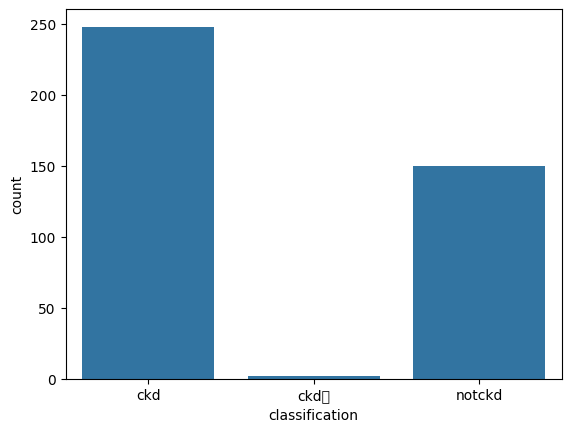

In [16]:
sns.countplot(x='classification', data=CKDisease)

4. Association Between Variables: Analyze variable relationships and their implications for feature selection or extraction

In [17]:
float_df = CKDisease[float_col]
float_df = float_df.apply(lambda x: x.fillna(x.mean()), axis=0)

In [18]:
correlation_matrix = float_df.corr()
correlation_matrix

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
age,1.000000,0.148004,-0.180570,0.114764,0.207857,0.214410,0.187544,0.127316,-0.085949,0.050148,-0.175380
bp,0.148004,1.000000,-0.182463,0.146593,0.200784,0.149100,0.183970,0.144359,-0.103220,0.066648,-0.279535
sg,-0.180570,-0.182463,1.000000,-0.466698,-0.287993,-0.326339,-0.278568,-0.213513,0.242841,-0.061821,0.531755
al,0.114764,0.146593,-0.466698,1.000000,0.268070,0.326400,0.405778,0.230479,-0.271316,0.114427,-0.549697
su,0.207857,0.200784,-0.287993,0.268070,1.000000,0.639186,0.152186,0.130122,-0.073715,0.181015,-0.191518
bgr,0.214410,0.149100,-0.326339,0.326400,0.639186,1.000000,0.127489,0.082242,-0.154393,0.056695,-0.269149
bu,0.187544,0.183970,-0.278568,0.405778,0.152186,0.127489,1.000000,0.581222,-0.307360,0.336979,-0.540641
sc,0.127316,0.144359,-0.213513,0.230479,0.130122,0.082242,0.581222,1.000000,-0.624491,0.205347,-0.342079
sod,-0.085949,-0.103220,0.242841,-0.271316,-0.073715,-0.154393,-0.307360,-0.624491,1.000000,0.067449,0.333614
pot,0.050148,0.066648,-0.061821,0.114427,0.181015,0.056695,0.336979,0.205347,0.067449,1.000000,-0.100606


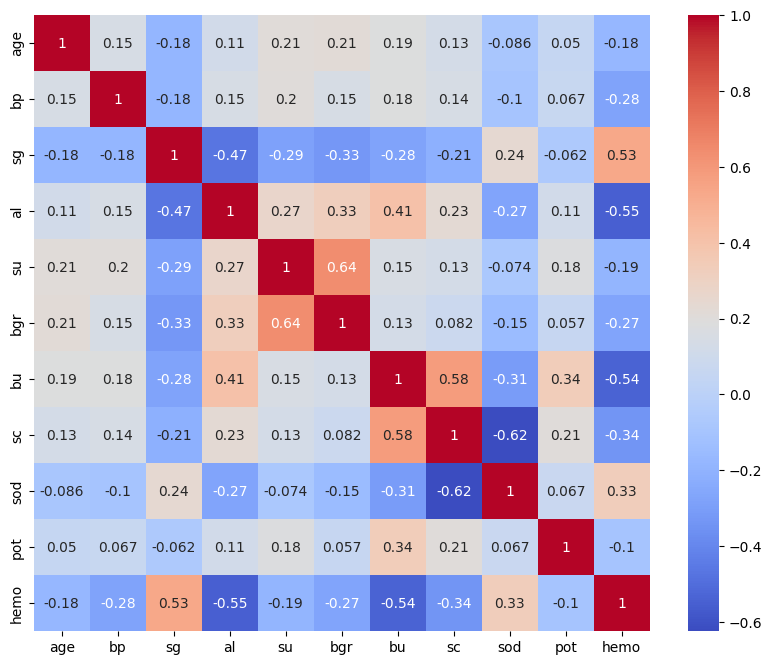

In [20]:
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', cbar=True, square=True)
plt.show()

The heatmap is diagonal symmetry. According to the heatmap, it can be found that there is a
negative correlation between blue and a positive correlation between red. For
example, the correlation between bp and hemo is -0.28 and the correlation between
sg and hemo is 0.53.

5. Missing Value Analysis and Handling: Implement your strategy for identifying and addressing missing values in the dataset, or provide reasons for not addressing them.

In [24]:
missing_value = CKDisease.isnull().sum()
missing_value

age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [58]:
print(CKDisease.shape)
CKDisease_cleaned = CKDisease.dropna()
print(CKDisease_cleaned.shape)

(400, 26)
(158, 26)


In [25]:
CKDisease_cleaned = CKDisease.dropna()
CKD_No = CKDisease_cleaned[float_col]

6. Outlier Analysis: Implement your approach for identifying and managing outliers, or pro- vide reasons for not addressing them.

In [26]:
z_scroes = np.abs(stats.zscore(CKD_No))
outliers = np.where(z_scroes > 3)
outliers

(array([ 0,  1,  2,  6, 12, 18, 18, 19, 23, 23, 26, 31, 33, 34, 34, 36, 36,
        38, 38, 39, 40, 40, 40, 41, 41, 42, 42, 42]),
 array([ 8,  8,  5,  4,  7,  4,  9,  6,  6,  7,  8,  7,  7,  4,  7,  4,  5,
         7,  8,  4,  1,  6,  7,  4,  5,  6,  7, 10]))

In [27]:
no_outliers = CKDisease_cleaned[(z_scroes < 3).all(axis = 1)]

7. Sub-group Analysis: Explore potential sub-groups within the data, employing appropriate data science methods to find the sub-groups of patients and visualize the sub-groups. The sub-group analysis must not include the labels (for CKD patients and healthy controls).

In [28]:
x = CKDisease_cleaned.drop('classification', axis=1)

In [29]:
X_PCA = PCA()
loadings = pd.DataFrame(X_PCA.fit(x).components_.T, index=x.columns)
loadings

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
age,0.000044,0.020727,0.313500,-0.185826,-0.701004,-0.513627,0.273301,0.140848,-0.036657,0.058009,...,-0.004501,0.005891,0.072952,0.056216,-0.001775,-0.000031,-7.392093e-03,-0.000283,-0.004997,-0.013964
bp,0.000002,0.035400,0.067652,0.046718,0.025120,0.407139,0.825058,-0.102388,-0.318178,-0.095240,...,-0.048738,0.064591,0.027206,-0.064673,0.021877,-0.062808,1.287280e-02,0.044848,-0.002837,-0.028386
sg,-0.000089,-0.069240,-0.349792,0.214633,-0.150371,0.007661,0.210613,-0.233942,0.372096,0.710201,...,-0.094894,-0.018434,0.099751,0.015594,0.013670,0.056837,3.999720e-02,-0.014557,0.020821,0.051542
al,0.000105,0.086506,0.354798,-0.053853,0.245396,0.024628,0.049722,0.366635,-0.004227,0.258650,...,0.186120,-0.034904,0.028970,-0.091987,0.092482,0.028324,-3.124977e-02,0.130183,-0.102601,0.017576
su,0.000048,0.031270,0.400688,0.079648,-0.122333,0.389188,-0.105558,-0.128379,0.213501,0.154699,...,0.028203,0.016616,0.047583,0.293827,0.052177,-0.109216,-1.282485e-01,0.023675,-0.036312,-0.023774
rbc,-0.000011,-0.015295,-0.084867,0.066915,-0.038577,-0.061664,-0.031825,-0.004106,0.030667,0.057753,...,-0.034594,0.343663,-0.012850,-0.696004,0.013198,-0.122331,1.271279e-01,0.128402,0.031432,-0.366889
pc,-0.000021,-0.031640,-0.083082,0.031712,-0.086061,0.050781,0.054878,-0.019013,0.036327,-0.056850,...,0.560321,-0.010241,0.024108,-0.246467,0.362295,0.507457,-9.504404e-03,-0.175262,-0.191054,0.320121
pcc,0.000013,0.016963,0.014968,-0.055576,0.046849,-0.010613,-0.009634,0.006357,-0.105535,0.080766,...,-0.429113,0.342571,-0.105319,-0.006576,0.013106,0.246891,-5.961398e-01,-0.206342,-0.049116,0.263687
ba,0.000014,0.011158,0.054319,-0.037182,0.024958,0.065924,-0.045905,0.035100,-0.091148,-0.050776,...,-0.344878,-0.082938,0.414898,0.058157,0.108969,0.322578,4.658541e-01,-0.488863,0.168440,-0.123985
bgr,0.000056,0.038115,0.443833,-0.095012,-0.201793,0.385907,-0.198867,-0.168903,0.207283,0.043672,...,0.057824,0.143680,0.106218,-0.203356,-0.088188,0.009185,1.095654e-01,0.008531,0.039788,0.040300


In [30]:
scores_PCA = pd.DataFrame(X_PCA.fit_transform(x), index=x.index)
scores_PCA

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
3,-1775.937410,12.277046,0.531766,-1.898433,1.606408,-0.467304,-0.989909,1.926934,-1.682763,0.521791,...,0.159883,0.929139,-0.439554,-0.045305,-0.204214,-0.266805,-0.004653,0.155941,0.054602,0.245320
9,3624.062410,9.510131,-0.930548,-0.411131,1.170972,-0.595923,1.413588,0.403137,-0.530532,1.438227,...,-0.542576,-0.020200,-0.525777,0.808045,-0.102422,0.081002,-0.467015,-0.629513,-0.211007,-0.269306
11,-3975.936184,14.552231,1.909266,-1.708721,-0.669518,0.490025,-1.551092,0.242885,-0.408185,0.135829,...,-0.231872,0.827651,0.022348,-0.380794,-0.071166,0.056142,-0.319929,-0.011892,0.060346,0.446355
14,2524.076808,23.743046,-0.438817,-0.121706,-1.087686,0.015895,-0.771560,-0.255492,-0.784187,0.328447,...,-0.847077,0.190483,0.037954,0.040243,0.470340,0.512131,-0.049698,0.274732,0.308311,-0.110322
20,724.069302,17.572271,-0.506429,-0.386704,-0.123167,-0.798790,0.173911,-0.608048,0.306640,-0.143327,...,-0.473666,0.046594,-0.695794,0.467278,0.182941,0.060976,0.762369,0.411019,-0.341455,0.323852
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,-1775.953785,-3.305705,0.422959,0.065001,-0.493713,-0.044379,0.425593,-0.643332,-0.145772,-0.745943,...,0.015576,0.193601,0.006698,-0.086394,0.116852,-0.108326,0.032648,0.037897,-0.087687,0.007741
396,-675.961775,-11.542973,0.312832,-0.026240,0.646350,-0.042683,0.355971,0.448940,0.387876,0.187914,...,-0.182079,0.058023,-0.142936,0.108226,-0.096713,0.063378,-0.020013,-0.089322,0.012249,-0.041708
397,-1875.955914,-5.251541,-0.331084,0.261720,1.673644,1.213478,-0.126453,-0.051150,-0.496399,-0.258788,...,-0.003141,0.025829,-0.161402,-0.143512,0.021252,-0.050210,0.021839,0.035580,0.011277,-0.033874
398,-1275.958300,-7.864024,-0.082125,0.452053,1.734872,0.316668,-0.801596,0.284339,0.713136,0.496484,...,-0.082729,-0.026519,-0.055032,-0.061082,0.070570,0.065391,0.070651,-0.040942,0.082958,0.076491


In [31]:
scores_PCA[0]

3     -1775.937410
9      3624.062410
11    -3975.936184
14     2524.076808
20      724.069302
          ...     
395   -1775.953785
396    -675.961775
397   -1875.955914
398   -1275.958300
399   -1675.960104
Name: 0, Length: 158, dtype: float64

In [32]:
#make 2 clusters
km = KMeans(n_clusters=2, n_init=20, random_state=0)
km.fit(x)
km.labels_

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0], dtype=int32)

In [33]:
pd.Series(km.labels_).value_counts()

0    143
1     15
Name: count, dtype: int64

In [34]:
x

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane
3,-0.203139,-0.473370,-2.173584,2.208413,-0.410106,1.0,0.0,1.0,0.0,-0.392022,...,-0.456071,32,6700,3.9,1.0,0,0,0.0,1.0,1.0
9,0.088445,0.990117,0.454071,0.727772,-0.410106,0.0,0.0,1.0,0.0,-0.985679,...,-1.040585,29,12100,3.7,1.0,1,0,0.0,0.0,1.0
11,0.671612,-0.473370,-1.297699,1.468092,-0.410106,0.0,0.0,1.0,0.0,2.929931,...,-0.593604,32,4500,3.8,1.0,1,0,0.0,1.0,0.0
14,0.963195,0.258373,-1.297699,1.468092,1.412011,1.0,0.0,1.0,1.0,0.113218,...,-2.381529,16,11000,2.6,1.0,1,1,0.0,1.0,0.0
20,0.554978,0.258373,-0.421814,0.727772,-0.410106,0.0,0.0,0.0,0.0,0.315314,...,-1.659482,24,9200,3.2,1.0,1,1,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.205078,0.258373,0.454071,-0.752868,-0.410106,1.0,1.0,0.0,0.0,-0.101509,...,1.091172,47,6700,4.9,0.0,0,0,1.0,0.0,0.0
396,-0.553039,-0.473370,1.329955,-0.752868,-0.410106,1.0,1.0,0.0,0.0,-0.922524,...,1.366237,54,7800,6.2,0.0,0,0,1.0,0.0,0.0
397,-2.302541,0.258373,0.454071,-0.752868,-0.410106,1.0,1.0,0.0,0.0,-0.606749,...,1.125555,49,6600,5.4,0.0,0,0,1.0,0.0,0.0
398,-2.010957,-1.205114,1.329955,-0.752868,-0.410106,1.0,1.0,0.0,0.0,-0.429915,...,0.575424,51,7200,5.9,0.0,0,0,1.0,0.0,0.0


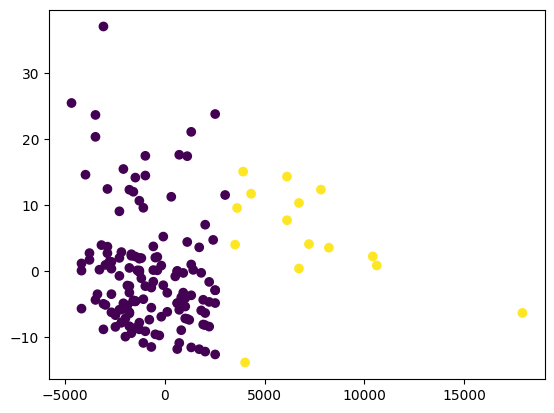

In [35]:
plt.scatter(scores_PCA[0], scores_PCA[1], c=km.labels_)

8. Data Splitting: Segregate 30% of the data for testing, using a random seed of 1. Use the remaining 70% for training and model selection.

In [60]:
x_train, x_test, y_train, y_test = train_test_split(
    CKDisease_cleaned.drop('classification', axis=1),
    CKDisease_cleaned['classification'],
    test_size=0.3,
    random_state =1
)


9. Classifier Choices: Identify the two classifiers you have chosen and justify your selections.

- We can choose the K-Nearest Neighbors(KNN) method to identify the two classifiers and this method used to calculates the 'distance' between different observations. If one feature has a much larger range of values than another feature, the distance will be domianted by the features with larger scale by changing the k-values.
- We can also use Decision trees to analysis. It's easy to understand and interpret the model's decisions. Decision trees can capture non-linear relationships between features and the target variable.

10. Performance Metrics: Outline the two metrics for comparing the performance of the classifiers.

We can use Accuracy to measures the proportion of correctly classified instances among all instances. Accuracy = Number of Correct Predictions / Total Number of Predictions

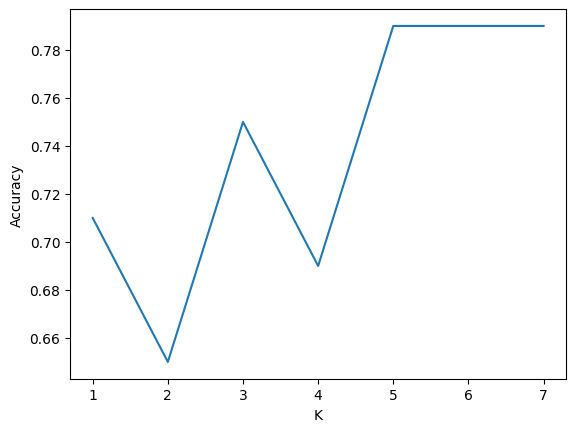

In [44]:
knn = neighbors.KNeighborsClassifier(
      n_neighbors = 5,
      algorithm='brute'
     )

k_range = range(1, 8)
scores = []

for k in k_range:
     knn = neighbors.KNeighborsClassifier(n_neighbors=k)
     knn.fit(x_train, y_train)
     y_pred = knn.predict(x_test)
     scores.append(round(metrics.accuracy_score(y_test, y_pred),2))

plt.plot(k_range, scores)
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.xticks(range(1,8))
plt.show()

Also, we can choose the F1-score. The F1-score is useful when the class distribution is imbalanced because it considers false positives and false negatives. The F1-score reaches its best value at 1 and worst at 0. 
F1-score = 2× (Precision * Recall) / Precision + Recall
Precision = True Positives / (True Positives + False Positives)
Recall= True Positives / (True Positives + False Negatives)

11. Feature Selection/Extraction: Implement methods to enhance the performance of at least one classifier in (9). The answer for this question can be included in (12).

By enhancing KNN feature Selection: we can select the top k features with the highest score to use in the KNN classifier. This helps in focusing on the most informative features for the classifier.

12. Classifier Comparison: Utilize the selected metrics to compare the classifiers based on the test set. Discuss your findings (at least two statements).

According to the plot, K=5 is the best value because it has a higher accuracy than other values and stable.

13. Interpretable Classifier Insight: After re-training the interpretable classifier with all available data, analyze and interpret the significance of predictor variables in the context of the data and the challenge (at least two statements).

We can try to decrease the dimensions or change the variable selection by using differnent k-values. 

14. [Bonus] Sub-group Improvement Strategy: If sub-groups were identified, propose and implement a method to improve one classifier performance further. Compare the performance of the new classifer with the results in (12).

15. Team Contributions: work individually

16. Link to the public GitHub repository: https://github.com/Fung2u/3DA_A6.git